SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3664409647.py, line 11)

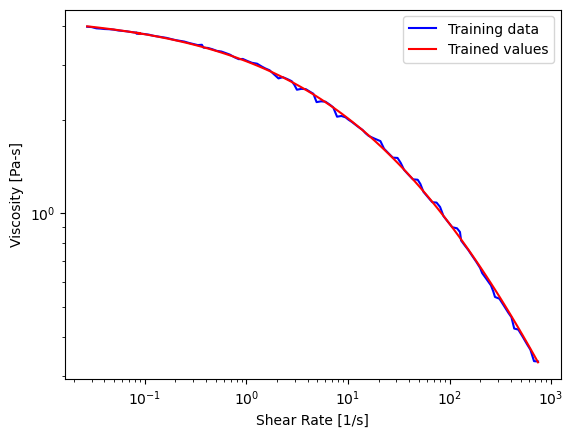

Viscosity at infinite shear rate (eta_inf): 0.0010000000000012607 Pa.s
Viscosity at zero shear rate (eta_0): 4.378652809268743 Pa.s
Carreau-Yasuda model parameter (a): 0.38568897016600096 1/s
Power-law exponent (n): 0.14292607803679486
Material time constant (lambda): 0.010364981477095596 s


In [11]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel('Viscosity vs Shear Rate.xlsx', sheet_name='CMC 3')
x = np.array(df.iloc[2:,1:2]).flatten()  # shear rate, units: 1/s
y = np.array(df.iloc[2:,2:3]).flatten()  # viscosity, units: Pa.s

# Define the Carreau-Yasuda model function
def carreau_yasuda_model(shear_rate, viscosity_inf, viscosity_0, a, n, lambda_):
    return viscosity_inf + (viscosity_0 - viscosity_inf) * (1 + (lambda_ * shear_rate)**a)**((n-1)/a)

# Set initial guesses for the model parameters
viscosity_inf_guess = 0.1
viscosity_0_guess = 10
a_guess = 0.1
n_guess = 0.5
lambda_guess = 0.01

# Fit the model to the data using scipy's curve_fit function
bounds = ([0.001, 0, 0, 0.0001, 0.0001], [np.inf, np.inf, 0.5, 1, np.inf])
params, cov = curve_fit(carreau_yasuda_model, x, y, p0=[viscosity_inf_guess, viscosity_0_guess, a_guess, n_guess, lambda_guess], bounds=bounds, maxfev=100000)

# Extract the fitted parameters
viscosity_inf = params[0]
viscosity_0 = params[1]
a = params[2]
n = params[3]
lambda_ = params[4]

 # Normalize the data
# scaler = MinMaxScaler()
# x = scaler.fit_transform(x.reshape(-1, 1))
# y = scaler.fit_transform(y.reshape(-1, 1))

# # Split the data into training and test sets
# train_size = int(len(x) * 0.8)
# test_size = len(x) - train_size
# x_train, x_test = x[0:train_size,:], x[train_size:len(x),:]
# y_train, y_test = y[0:train_size,:], y[train_size:len(y),:]

# # # Define the RNN model
# # model = Sequential()
# # model.add(LSTM(50, activation='relu', input_shape=(1, 1)))
# # model.add(Dense(1))
# # model.compile(optimizer='adam', loss='mse')

# # #Train the model
# # r2_threshold = 0.999
# # r2_score_1= 0
# # while r2_score_1 < r2_threshold:
# #     model.fit(x_train.reshape(x_train.shape[0], 1, 1), y_train, epochs=40, batch_size=1, verbose=0)
# #     y_train_pred = model.predict(x_train.reshape(x_train.shape[0], 1, 1))
# #     r2_score_1 = r2_score(y_train, y_train_pred)
# #     print(f"Training set R2 score: {r2_score_1}")

# # #Evaluate the model on the test set
# # y_test_pred = model.predict(x_test.reshape(x_test.shape[0], 1, 1))
# # test_r2_score = r2_score(y_test, y_test_pred)
# # print(f"Test set R2 score: {test_r2_score}")
# x_train = scaler.inverse_transform(x_train.reshape(-1, 1))
# y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
# x = scaler.inverse_transform(x.reshape(-1, 1))
# y = scaler.inverse_transform(y.reshape(-1, 1))
#Plot the results
y_n=carreau_yasuda_model(x,params[0],params[1],params[2],params[3],params[4])
y_n.shape
fig, ax = plt.subplots()
# ax.figure(figsize=(10, 6))
ax.plot(x, y, color='blue', label='Training data')
ax.plot(x, y_n, color='red', label='Trained values')
# ax.plot(x_test, y_test, color='green', label='Test data')
# ax.plot(x_train, y_train_pred, color='red', label='Model prediction')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Shear Rate [1/s]')
ax.set_ylabel('Viscosity [Pa-s]')
ax.legend()
plt.show()

print(f"Viscosity at infinite shear rate (eta_inf): {viscosity_inf} Pa.s")
print(f"Viscosity at zero shear rate (eta_0): {viscosity_0} Pa.s")
print(f"Carreau-Yasuda model parameter (a): {a} 1/s")
print(f"Power-law exponent (n): {n}")
print(f"Material time constant (lambda): {lambda_} s")

# # Print the fitted parameters
# print(f"Viscosity at infinite shear rate (eta_inf): {viscosity_inf} Pa.s")
# print(f"Viscosity at zero shear rate (eta_0): {viscosity_0} Pa.s")
# print(f"Carreau-Yasuda model parameter (a): {a} 1/s")
# print(f"Power-law exponent (n): {n}")
# print(f"Material time constant (lambda): {lambda_} s")
